In [ ]:
%pip install sentence-transformers

In [ ]:
%pip install seaborn

For clustering, we can either load the articles and use the Hugging Face Sentence Tranformer API to gennerate embeddings for the paper abstracts, using an embedding model of choice, or we can use the embeddings generated for our vector database in notebooks 3.x.

In [ ]:
from tinydb import TinyDB, Query

db = TinyDB('db.json')
table = db.table('articles')

articles = table.all()
print(f'loaded {len(articles)} articles')

sentences = [x['abstract'] for x in articles if x['abstract'] != 'No abstract available.']
print(f'retaining {len(sentences)} articles')

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/allenai-specter')
embeddings = model.encode(sentences)

Instead of (re)generating embeddings using the Sentence Transformer API, we can load embeddings from our vector data store.

In [1]:
import chromadb
from chromadb.utils import embedding_functions

client = chromadb.PersistentClient(path="vectors_db")
ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name="allenai-specter")
    
collection = client.get_collection(
    name='articles-specter-embeddings',
    embedding_function=ef
)

embeddings = collection.get(
    include=['embeddings']
)['embeddings']

print(f'retrieved {len(embeddings)} paper embeddings')

retrieved 1318 paper embeddings


<Axes: >

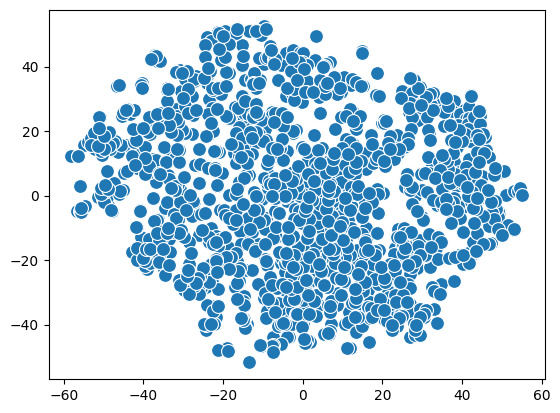

In [2]:
from sklearn.manifold import TSNE
import seaborn as sns

# Reduce embedding dimensionality using t-SNE for visualization
viz = TSNE(n_components=2, max_iter=10000).fit_transform(embeddings)
# viz_embeddings = TSNE(n_components=2, perplexity=100, n_iter=10000).fit_transform(embeddings)

# Plot
sns.scatterplot(x=viz[:, 0], y=viz[:, 1], s=100)
# sns.scatterplot(x=viz_embeddings[:, 0], y=viz_embeddings[:, 1], hue=labels, palette=palette, s=100)

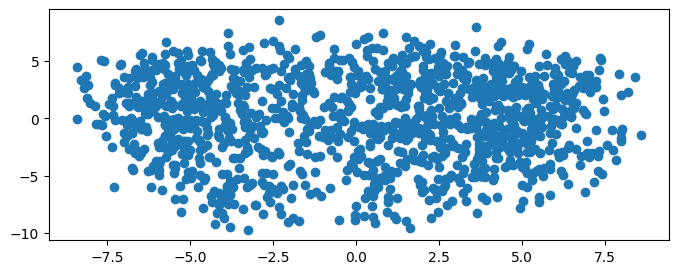

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca = pca.fit(embeddings)
pca = pca.transform(embeddings)

fig = plt.figure(figsize=(8,3))
plt.scatter(pca[:,0],pca[:,1])
plt.show()

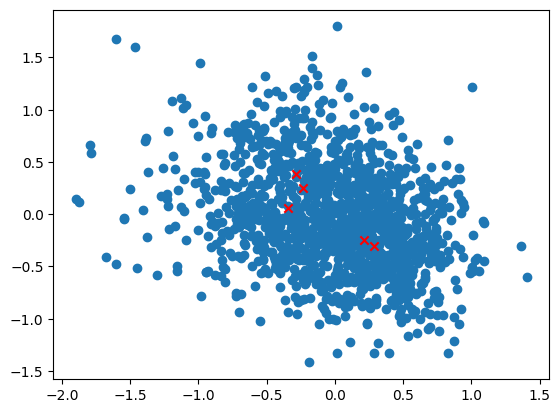

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = embeddings

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red')
plt.show()

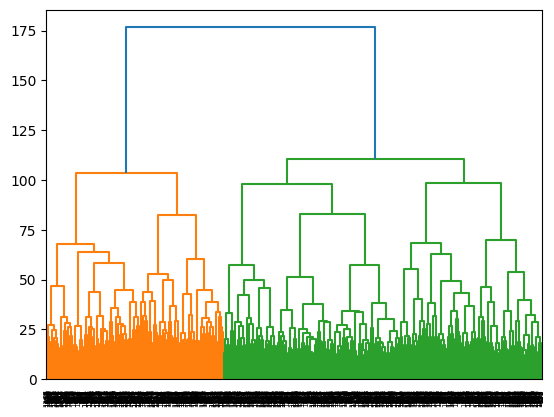

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

linkage_matrix = linkage(embeddings, method='ward')

dendrogram(linkage_matrix)
plt.show()

In [6]:
model = AgglomerativeClustering(n_clusters=8, linkage='ward')
model.fit(embeddings)

labels = model.labels_
print(labels)

[3 5 5 ... 1 6 4]


Re-run the clustering analysis using the default Chroma embedding model.

In [7]:
collection = client.get_collection(
    name='articles-default-embeddings'
)

embeddings = collection.get(
    include=['embeddings']
)['embeddings']

print(f'retrieved {len(embeddings)} paper embeddings')

retrieved 1318 paper embeddings


<Axes: >

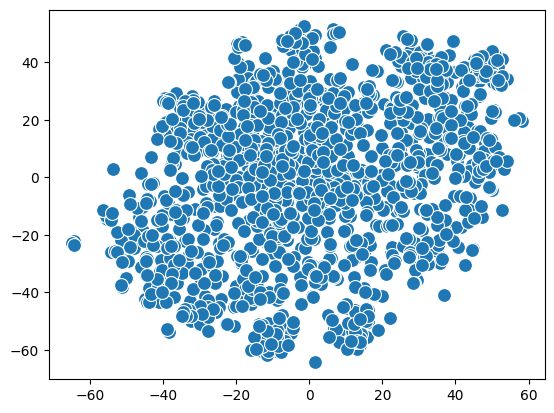

In [8]:
# Reduce embedding dimensionality using t-SNE for visualization
viz = TSNE(n_components=2, max_iter=10000).fit_transform(embeddings)
# viz_embeddings = TSNE(n_components=2, perplexity=100, n_iter=10000).fit_transform(embeddings)

# Plot
sns.scatterplot(x=viz[:, 0], y=viz[:, 1], s=100)
# sns.scatterplot(x=viz_embeddings[:, 0], y=viz_embeddings[:, 1], hue=labels, palette=palette, s=100)